# Pima Indian Diabetes Dataset - GA HW #3
### Zen Yui | 2016-02-27

- Give an overall summary of your performance from HW2 on the dataset
- Do you see any areas for improvement?
- Run k-Means on the dataset and describe your results
- Run PCA on the dataset and describe your results
- Use the cluster outputs you got from running k-means as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.
- Use the PCA outputs you got from running PCA above as your features. Rerun your "worst" and "best" model from HW2, with the PCA features instead of your old features. Describe your results.
- Give your conclusions on the use of k-Means and PCA on the Diabetes dataset

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [195]:
plt.style.use('ggplot')

In [196]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
cols = ['pregnancies','glucose','bp','skin','insulin','bmi','ped','age','class']
df = pd.read_csv(url, header=None)
df.columns = cols

In [197]:
# necessary?
df['class'] = pd.Categorical(df['class'])

In [198]:
df.describe()

,pregnancies,glucose,bp,skin,insulin,bmi,ped,age
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000


In [199]:
df.tail()

,pregnancies,glucose,bp,skin,insulin,bmi,ped,age,class
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


### dataset and observations

<strong><i>goal:</i></strong> To determine the most effecitve machine learning algorithm for predicting diabetes given the provided dataset

<strong><i>preliminary observations:</i></strong>
<ul>
<li>8 attributes and a positive/negative diabetes diagnosis</li>
<li>768 Pima Indian patients</li>
<li>all patients are female</li>
<li>all patients at leats 21 years of age</li>
<li>all features are numeric</li>
<li>overall diagnoses rate is ~35%</li>
</ul>


<strong><i>data dictionary:</i></strong>
<ul>
<li><strong>preg</strong> (int) - <i>Number of times pregnant</i></li>
<li><strong>glu</strong> (int) - <i>Plasma glucose concentration a 2 hours in an oral glucose tolerance test</i></li>
<li><strong>bp</strong> (int) - <i>Diastolic blood pressure (mm Hg)</i></li>
<li><strong>skin</strong> (int) - <i>Triceps skin fold thickness (mm)</i></li>
<li><strong>insulin</strong> (int) - <i>2-Hour serum insulin (mu U/ml)</i></li>
<li><strong>bmi</strong> (float) - <i>Body mass index (weight in kg/(height in m)^2)</i></li>
<li><strong>ped</strong> (float) - <i>Diabetes pedigree function</i></li>
<li><strong>age</strong> (int) - <i>Age (years)</i></li>
<li><strong>class</strong> (int) - <i>Class variable (0 or 1) - 1 is a positive diabetes diagnosis</i></li>
</ul>

### handle missing data

In [200]:
# Filling glucose, bp, skin, and insulin with np.nan as "0" values are meaningless
for feature in ['glucose','bp','skin','insulin','bmi']:
    df.loc[:,feature].replace(to_replace=0, value=np.nan, inplace=True)

In [201]:
# fill null records with median of that feature
for f in ['glucose','bmi','bp','insulin','skin']:
    med = df[f].median()
    df[f].fillna(med, inplace=True)

### hw2 performance summary
My HW2 performnce in the Pima Indians Diabetes dataset was good, but I see areas for improvement.  I spent considerable trying to understand the dataset and create a good data dictionary, and it paid off.  When I wasn't sure about the best course of action (like deciding between two methods of handling missing data), I created tried both, and I ended up with better overall performance as a result.

asdf

### split and scale data

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, ShuffleSplit

In [203]:
# separate the data set into features and prediction
X = df.drop('class',axis=1)
y = df['class']

In [204]:
# scale data
scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X))
X_scale.columns = X.columns

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=0)
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.25, random_state=0)

### k-means clustering

In [206]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

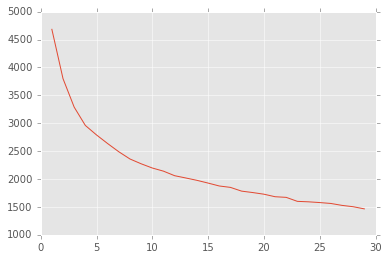

In [207]:
# finding the elbow plotting inertia
x = []
y = []
for n in range(1,30):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_train)
    x.append(n)
    y.append(km2.inertia_)
    
plt.plot(x, y);

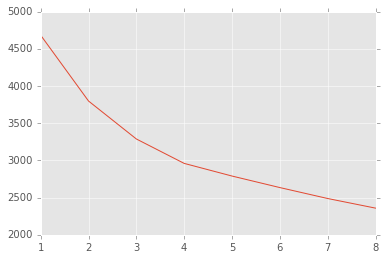

In [208]:
# not a clear elbow above, so plotting up to 8 clusters
plt.plot(x[:8], y[:8]);

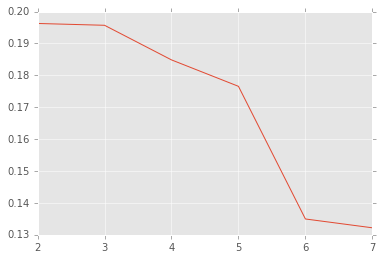

In [220]:
# plotting silhouette score
x = []
y = []
for n in range(2,8):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_train)
    centers = km2.fit_predict(X_scale)

    x.append(n)
    y.append(silhouette_score(X_scale, centers))

plt.plot(x,y);

#### using 4 clusters given apparent elbow and increased silhouette score

In [250]:
# create kmeans with 4 clusters, get cluster labels
km = KMeans(n_clusters=4, n_init=20)
cluster_labels = km.fit_predict(X_train)

In [251]:
# get specific inertia / silhouette score
print('inertia:\t {:.2f}'.format(km.inertia_))
print('silhouette:\t {:.5f}'.format(silhouette_score(X_train, cluster_labels)))

inertia:	 2959.83
silhouette:	 0.19138


In [254]:
# show cluster centers
pd.set_option('display.float_format', lambda x: '%.3f' % x)
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
dfclus = pd.DataFrame(columns, index=X.columns).copy()
dfclus.columns=['rotund','baby_mommas','young_healthy','at_risk']
dfclus

,rotund,baby_mommas,young_healthy,at_risk
pregnancies,1.821,7.509,2.371,3.611
glucose,124.007,132.199,107.096,160.056
bp,74.979,78.801,67.319,70.833
skin,37.221,29.766,23.655,32.722
insulin,131.407,134.029,114.039,411.361
bmi,39.517,32.513,28.077,35.803
ped,0.549,0.455,0.406,0.615
age,29.029,47.123,26.358,32.944


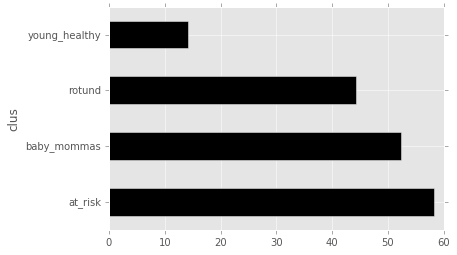

In [131]:
# Plot % diagnosis per cluster
dfcl = pd.DataFrame(zip(cluster_labels, y_train), columns=['clus','class'])
dfcl['clus'] = dfcl.clus.map({0: 'baby_mommas',1:'at_risk',2:'rotund',3:'young_healthy'})
(dfcl.groupby(['clus']).sum() / dfcl.groupby(['clus']).count()*100).plot(kind='barh', color='k', legend=None);

#### clustering yields some interesting results:
- <strong>baby_mommas</strong> - 7.5 pregnancies!, highest BP of the group, oldest (47 yo)
- <strong>at_risk</strong> - 3.6 pregancies, highest glucose (upper quartile), highest insulin, 32 yo, highest % positive diagnosis
- <strong>rotund</strong> - second highest BP, but only 29 years old.  Highest BMI and skin thickenss...
- <strong>young_healthy</strong> - 2.4 pregnancies and 26 yo. Low glucose and insulin, and lowest BP and BMI.  Lowest % positive diagnosis

Overall, silhouette score of 0.191 isn't that high, but intuitively it seems the clusters are reasonably different people.

### principal component analysis

In [259]:
from sklearn.decomposition import PCA

In [260]:
# create PCA model with 8 components (8 features)
# whiten set to True as PC's will be fed as input to models downstream
pca = PCA(whiten=True)#PCA(n_components=8, whiten=True)
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=True)

In [263]:
pca.explained_variance_ratio_

array([ 0.27966516,  0.19268398,  0.1479662 ,  0.1131793 ,  0.09608312,
        0.06552513,  0.05781534,  0.04708177])

In [317]:
# graph explained_variance_ratio values and cumulative sum
evr = pca.explained_variance_ratio_ * 100
dfev = pd.DataFrame(zip(evr,np.cumsum(evr)), columns=['explained_variance','var_cumulative'])
dfev.index=[i+1 for i in range(8)]
dfev

,explained_variance,var_cumulative
1,27.967,27.967
2,19.268,47.235
3,14.797,62.032
4,11.318,73.349
5,9.608,82.958
6,6.553,89.510
7,5.782,95.292
8,4.708,100.000


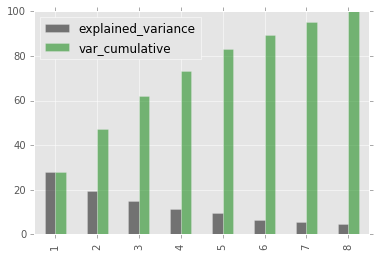

In [318]:
dfev[['explained_variance','var_cumulative']].plot(kind='bar', color=['k','g'], alpha=0.5);

<strong>PCA results</strong>
- 82.9% variance explained with 5 features
- 89.5% variance explained with 6 features